# Factor Analysis (FactorAnalysis) - `Autos` Dataset


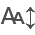

In [1]:
#disable warnings
from warnings import simplefilter, filterwarnings
simplefilter(action='ignore', category=FutureWarning)
filterwarnings("ignore")
#interactive notebooks
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [2]:
# Chargement des données
from pandas import read_excel
autos = read_excel("./data/Data_Methodes_Factorielles.xlsx",sheet_name="AUTOS_AFP",index_col=0)
autos

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


In [3]:
# Instanciation
from scientisttools import FactorAnalysis
res_fa = FactorAnalysis(n_components=None,rotate=None,max_iter=1)
res_fa.fit(autos)

FactorAnalysis(max_iter=1, n_components=None, rotate=None)

## Eigenvalues

### `absolute`

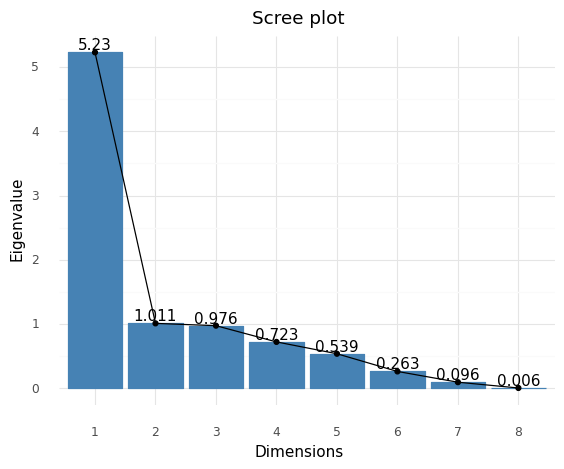

In [4]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_fa,element="eigenvalue",add_labels=True)
print(p)

### `proportion`

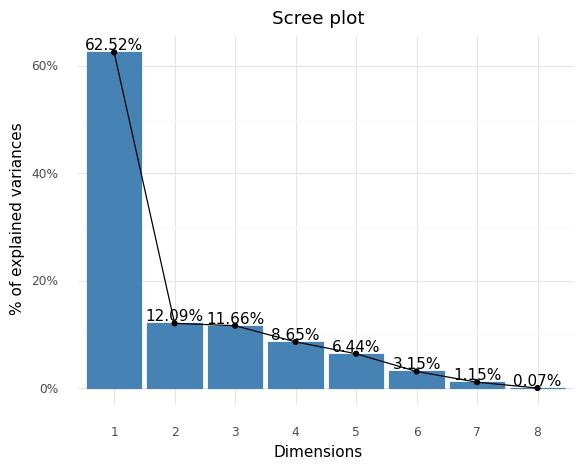

In [5]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_fa,element="proportion",add_labels=True)
print(p)

#### `cumulative`

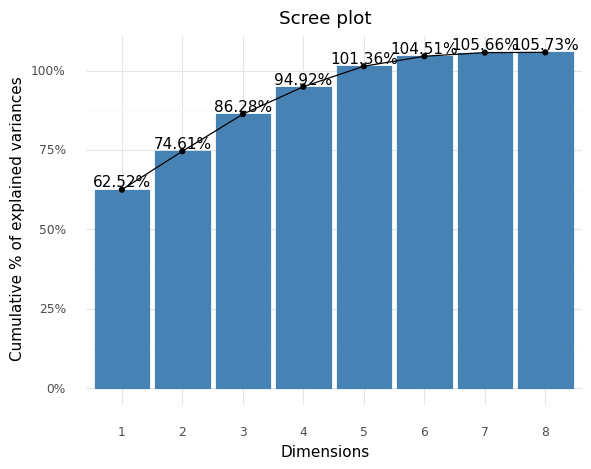

In [6]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_fa,element="cumulative",add_labels=True)
print(p)

## Individuals

### Color by RGB color

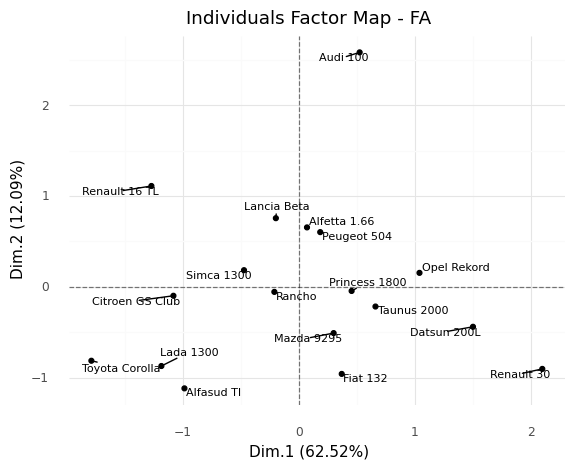

In [7]:
from scientisttools import fviz_fa_ind
p = fviz_fa_ind(res_fa,repel=True)
print(p)

### Color by quantitatives color

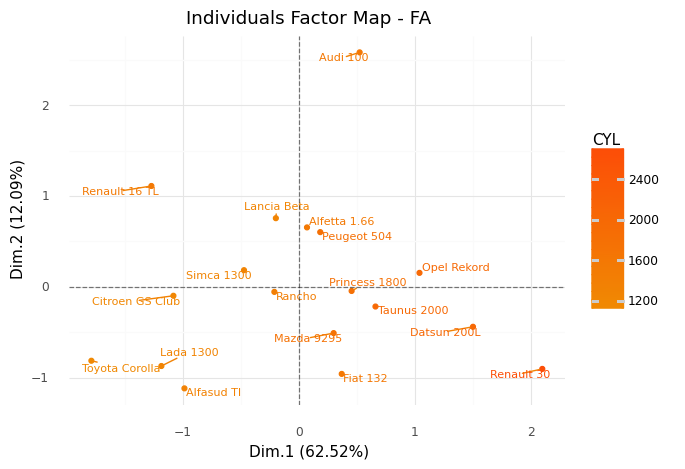

In [8]:
p = fviz_fa_ind(res_fa,col_ind="CYL",repel=True)
print(p)

### Color by numpy array

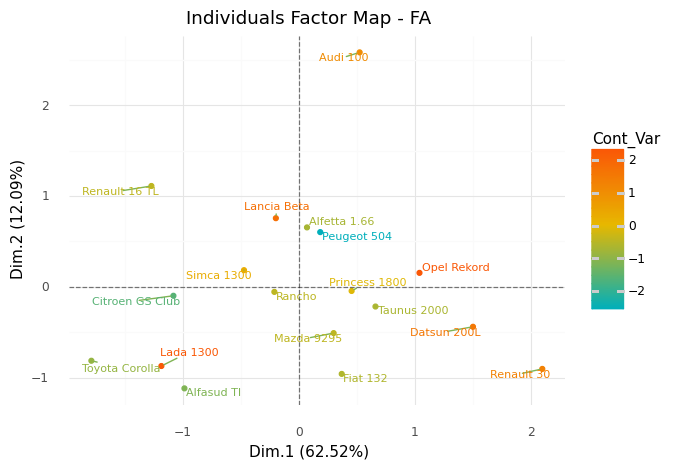

In [9]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_fa.call_.X.shape[0])
p = fviz_fa_ind(res_fa,col_ind=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

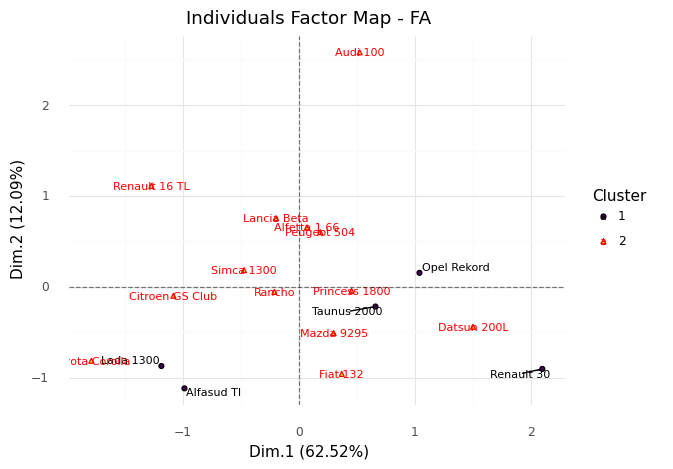

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=np.random.seed(123), n_init="auto").fit(res_fa.ind_.coord)
p = fviz_fa_ind(res_fa,col_ind=kmeans,repel=True)
print(p)

## Variables

### Color bu RGB color

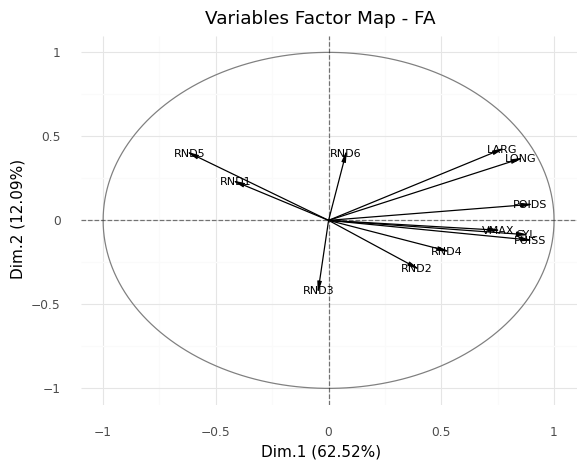

In [11]:
from scientisttools import fviz_fa_var
p = fviz_fa_var(res_fa)
print(p)

### Color by contrib

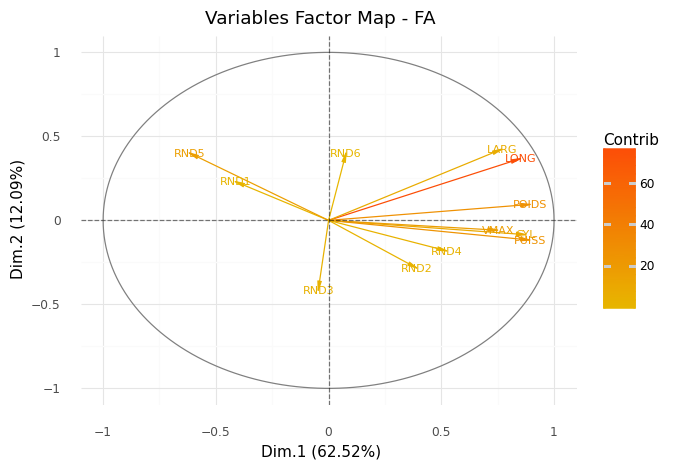

In [12]:
p = fviz_fa_var(res_fa,col_var="contrib")
print(p)

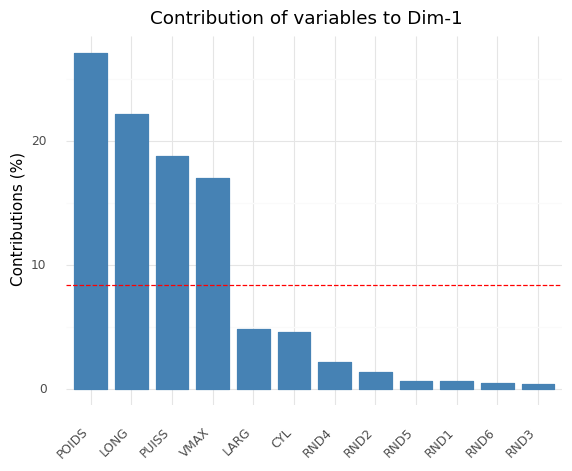

In [23]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_fa,element="var")
print(p)

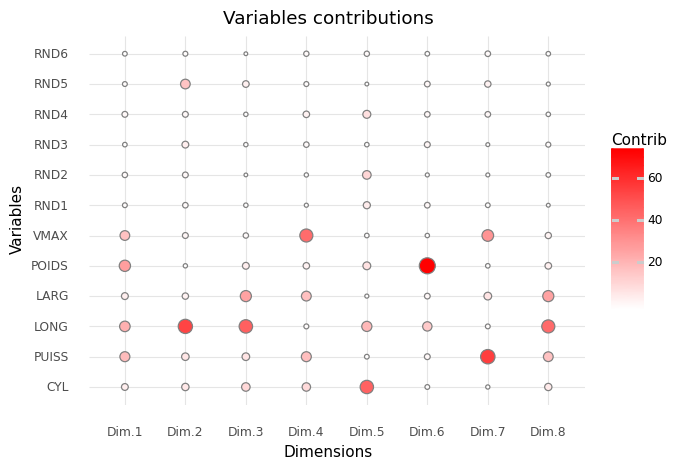

In [24]:
from scientisttools import fviz_corrplot
p = fviz_corrplot(res_fa.var_.contrib,title="Variables contributions",legend_title="Contrib")
print(p)

### Color by numy array

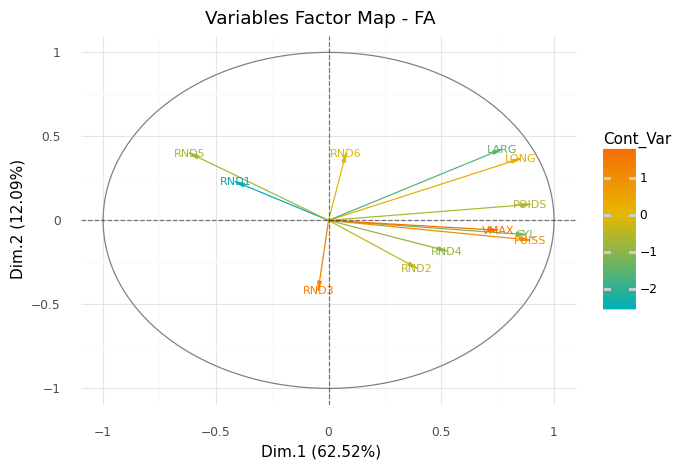

In [13]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_fa.call_.X.shape[1])
p = fviz_fa_var(res_fa,col_var=color_numpy)
print(p)

### Color by kmeans

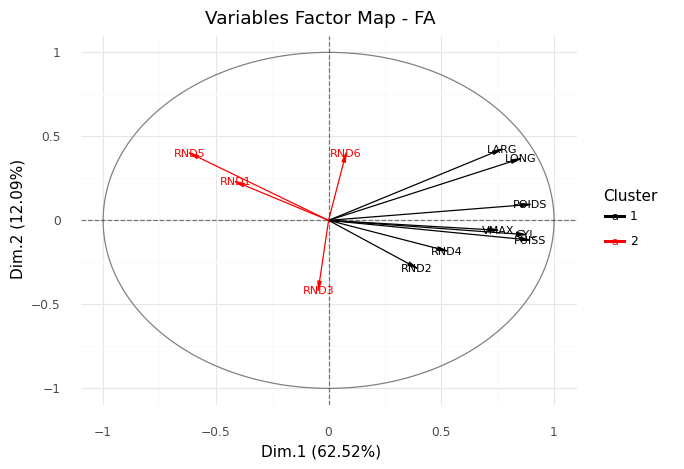

In [14]:
kmeans = KMeans(n_clusters=2, random_state=np.random.seed(123), n_init="auto").fit(res_fa.var_.coord)
p = fviz_fa_var(res_fa,col_var=kmeans)
print(p)

### Set limit

#### limit ccontrib

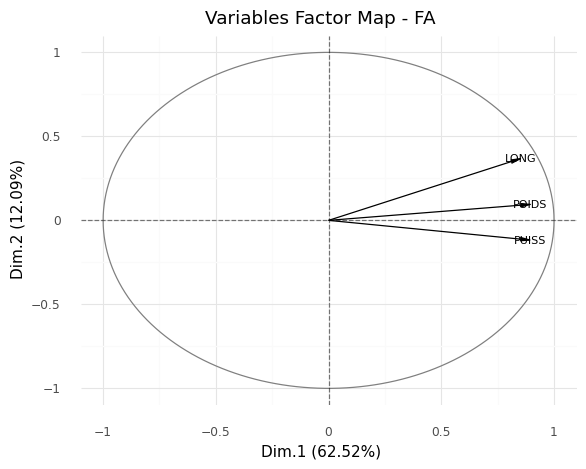

In [15]:
p = fviz_fa_var(res_fa,lim_contrib=20)
print(p)

# Plot contribution

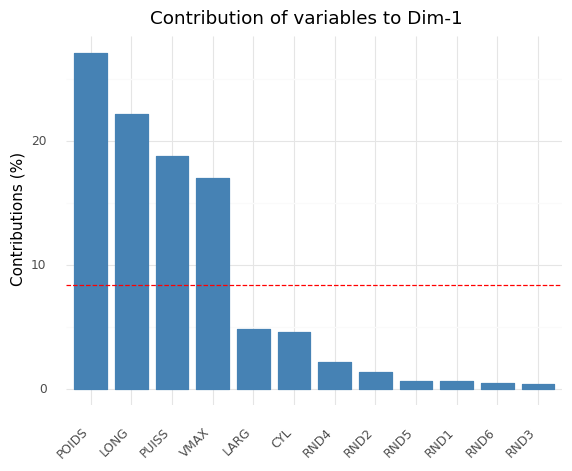

In [16]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_fa,element="var")
print(p)

### Corrcircle

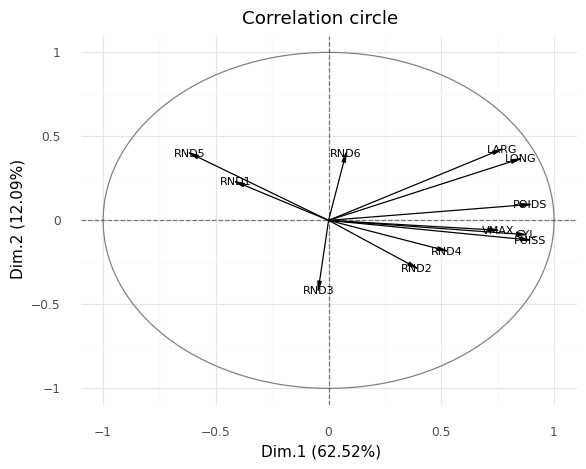

In [17]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_fa)
print(p)

## Biplot

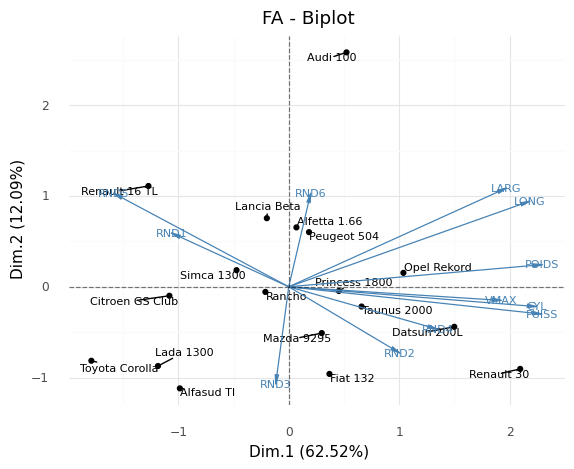

In [18]:
from scientisttools import fviz_fa_biplot
p = fviz_fa_biplot(res_fa,repel_ind=True)
print(p)

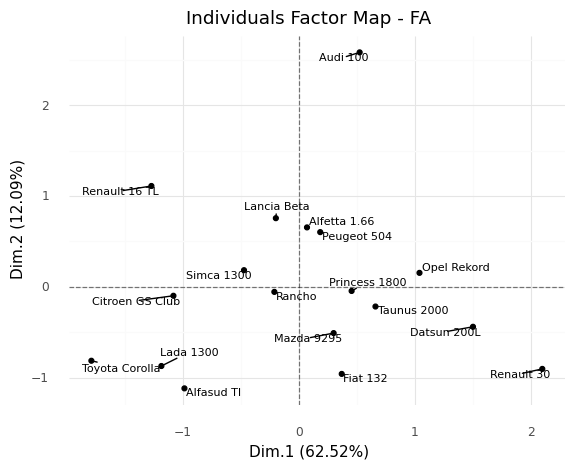

In [19]:
from scientisttools import fviz_fa
p = fviz_fa(res_fa,element="ind",repel=True)
print(p)

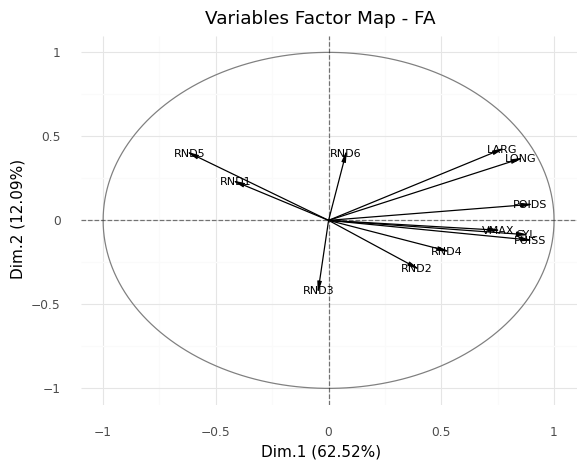

In [20]:
p = fviz_fa(res_fa,element="var")
print(p)

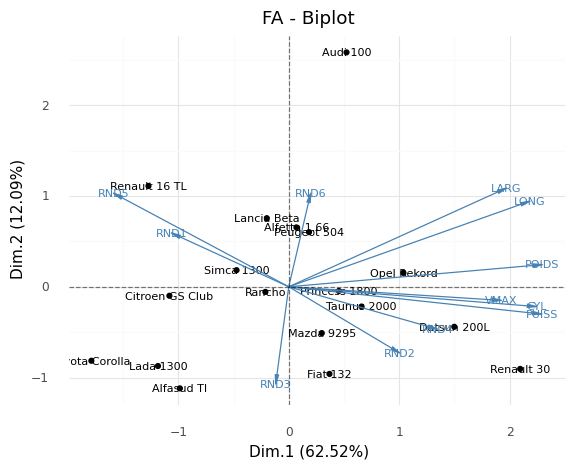

In [21]:
p = fviz_fa(res_fa,element="biplot")
print(p)

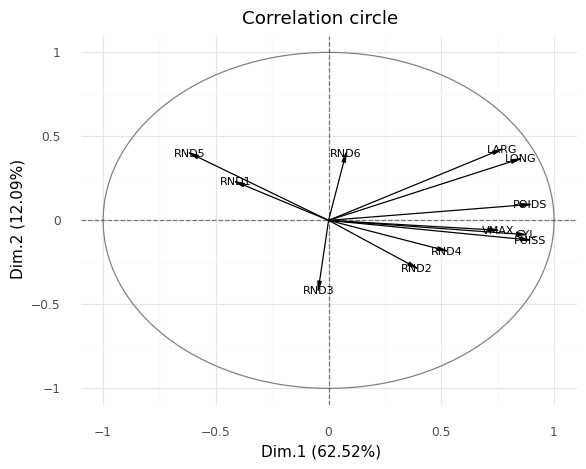

In [22]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_fa)
print(p)